<a href="https://colab.research.google.com/github/Shiva-Gangadhar/Face-Mask-Detection-System/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [4]:
from zipfile import ZipFile
# dataset = '/content/face-mask-dataset.zip'
dataset = '/content/Total_Data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
# with_mask_files = os.listdir('/content/data/with_mask')
# without_mask_files = os.listdir('/content/data/without_mask')
with_mask_files = os.listdir('/content/Total_Data/with_mask')
without_mask_files = os.listdir('/content/Total_Data/without_mask')

In [7]:
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['0_0_3 copy 31.jpg', 'with_mask_2833.jpg', 'with_mask_3689.jpg', '0_0_8 copy 3.jpg', 'with_mask_964.jpg']
['without_mask_3474.jpg', 'without_mask_2274.jpg', 'without_mask_1506.jpg', 'without_mask_2350.jpg', 'without_mask_2490.jpg']


In [8]:
print(with_mask_files[-5:])
print(without_mask_files[-5:])

['with_mask_3360.jpg', '0_0_6f3feedbly1g35rq7j549j20xc0m877l.jpg', 'with_mask_2419.jpg', 'with_mask_1835.jpg', 'with_mask_3610.jpg']
['without_mask_627.jpg', 'without_mask_2313.jpg', 'without_mask_1183.jpg', 'without_mask_1492.jpg', 'without_mask_1887.jpg']


In [9]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 4725
Number of without mask images: 4337


In [10]:
with_mask_labels = [1]*4725
without_mask_labels = [0]*4337

In [11]:
labels = with_mask_labels + without_mask_labels

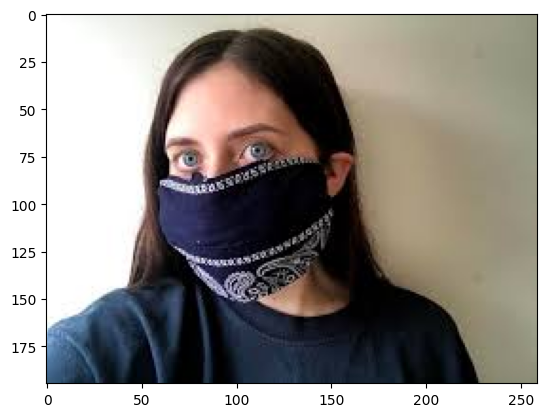

In [12]:
img = mpimg.imread('/content/Total_Data/with_mask/with_mask_3689.jpg')
imgplot = plt.imshow(img)
plt.show()

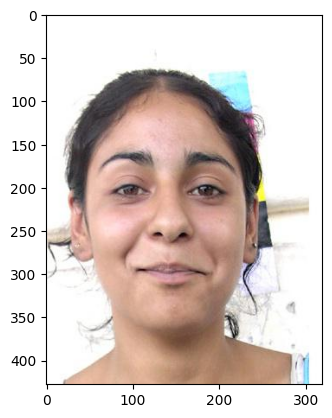

In [13]:
img = mpimg.imread('/content/Total_Data/without_mask/without_mask_1183.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [14]:
with_mask_path = '/content/Total_Data/with_mask/'

data =[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/Total_Data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[29, 28, 24],
        [28, 27, 23],
        [28, 27, 23],
        ...,
        [56, 55, 51],
        [55, 54, 51],
        [57, 56, 52]],

       [[29, 28, 24],
        [26, 25, 21],
        [29, 28, 24],
        ...,
        [58, 57, 53],
        [58, 57, 53],
        [59, 58, 54]],

       [[26, 22, 19],
        [24, 20, 17],
        [30, 26, 23],
        ...,
        [62, 60, 54],
        [64, 60, 56],
        [64, 61, 56]],

       ...,

       [[20, 15,  9],
        [21, 16, 10],
        [22, 16, 11],
        ...,
        [16, 10,  5],
        [15,  8,  1],
        [18, 11,  3]],

       [[20, 15,  9],
        [21, 16, 10],
        [23, 17, 12],
        ...,
        [16,  7,  3],
        [20, 11,  5],
        [20, 11,  4]],

       [[22, 15,  9],
        [23, 16, 10],
        [24, 17, 12],
        ...,
        [16,  7,  3],
        [23, 14,  5],
        [22, 12,  3]]], dtype=uint8)
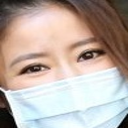

In [15]:
data[0]

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
type(data)

list

In [18]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [19]:
print(X.shape)
print(Y.shape)

(9062, 128, 128, 3)
(9062,)


**Train Test Split**

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(9062, 128, 128, 3) (7249, 128, 128, 3) (1813, 128, 128, 3)


In [22]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
X_train_scaled[0]

array([[[0.43137255, 0.35686275, 0.34117647],
        [0.38431373, 0.30196078, 0.28235294],
        [0.38823529, 0.29411765, 0.2745098 ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.42352941, 0.34901961, 0.33333333],
        [0.38039216, 0.29803922, 0.27843137],
        [0.38823529, 0.29019608, 0.27058824],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.41568627, 0.33333333, 0.32156863],
        [0.38039216, 0.29803922, 0.27843137],
        [0.38431373, 0.28627451, 0.26666667],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       ...,

       [[0.88235294, 0.6       , 0.44313725],
        [0.89019608, 0.61176471, 0.45490196],
        [0.89411765, 0

**Building a Convolutional Neural Networks(CNN)**

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import BatchNormalization

In [45]:
num_of_classes = 2

model = keras.Sequential()

model.add(layers.Conv2D(32, kernel_size=(19,19),activation='relu',input_shape=(128,128,3)))
# model.add(layers.Conv2D(32, kernel_size=(19,19),activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(19,19),activation='relu'))
# model.add(layers.Conv2D(64, kernel_size=(19,19),activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_of_classes,activation='sigmoid'))

In [46]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
# from tensorflow.keras.optimizers import AdamW

# optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [49]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=20)

Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - acc: 0.9708 - loss: 0.0924 - val_acc: 0.9338 - val_loss: 0.2152
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - acc: 0.9738 - loss: 0.0807 - val_acc: 0.9490 - val_loss: 0.1622
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9683 - loss: 0.0921 - val_acc: 0.9586 - val_loss: 0.1116
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9742 - loss: 0.0741 - val_acc: 0.9531 - val_loss: 0.1672
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9818 - loss: 0.0586 - val_acc: 0.9434 - val_loss: 0.1559
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - acc: 0.9806 - loss: 0.0542 - val_acc: 0.9448 - val_loss: 0.1924
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - acc: 0.9786 - loss: 0.0564 - val_acc: 0.9572 - val_loss: 0.1452
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - acc: 0.9774 - loss: 0.0612 - val_acc: 0.9421 - val_loss: 0.1761
Epoch 9/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 25m

In [50]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test accuracy =',accuracy)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9599 - loss: 0.1334
Test accuracy = 0.9591836929321289


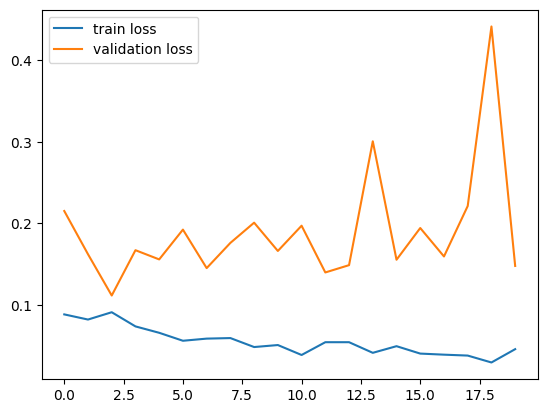

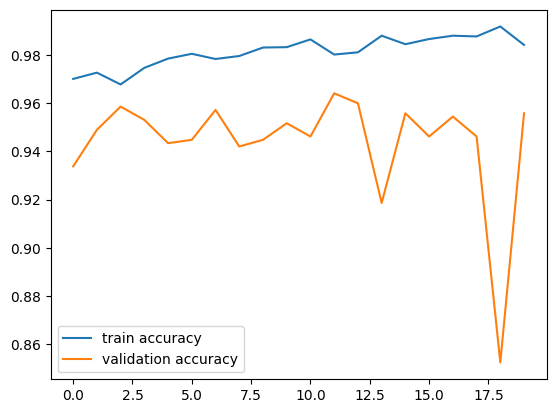

In [51]:
h = history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/input_image_with_mask.jpg


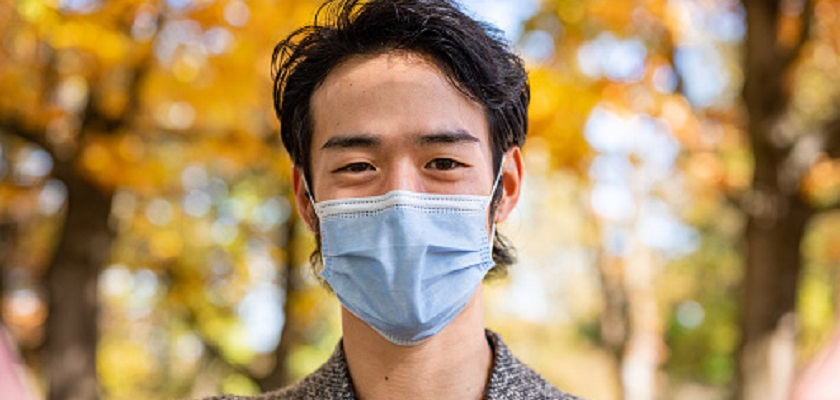

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.0996324 0.9747395]]
1
The person in the image is wearing a mask


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_prediction_label = np.argmax(input_prediction)

print(input_prediction_label)

if input_prediction_label ==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')